# Functionality implementation

In [562]:
import random
from matplotlib import pyplot as plt

# Sometimes we have more than one input to our objective function,
# here we split the chromosome into the corresponding solutions:
def split_chromosome(chromosome, items):
    solutions = ()
    l = len(chromosome)
    step = l // items
    return tuple(chromosome[index:(index+step)]
            for index in range(0, l, step)
           )
# encoding and decoding solutions:
def decode_genes(a, b, solution):
    precision = (b-a)/(2**len(solution) - 1)
    return sum([b*2**i 
         for i, b in enumerate(reversed(solution))
        ]) * precision + a, precision

def gen_random_solution(l):
    return [1 if random.random() >= 0.5 else 0
            for _ in range(l)]

def create_random_population(N, l):
    return [gen_random_solution(l) for _ in range(N)]

def crossover_random(p_a, p_b):
    l = len(p_a) # we assume both parents have same chromosome length
    indexes = {i for i in range(l)}
    # select which genes will come from which parent
    p_a_genes = random.sample(indexes, l//2)
    p_b_genes = indexes - set(p_a_genes)
    child = []
    for i in indexes:
        child.append(p_a[i] if i in p_a_genes else p_b[i])
    print(f'parent a: {p_a}')
    print(f'parent b: {p_b}')
    print(f'parent a genes: {p_a_genes}')
    print(f'parent b genes: {p_b_genes}')
    print(f'The baby: {child}')
    return child

# p_c means probability of crossover
def crossover_two_points(p_a, p_b, p_c = 1.0):
    if p_c >= random.random():
        l = len(p_a) # we assume both parents have same chromosome length
        indexes = {i for i in range(l)}
        # select which genes will come from which parent
        two_points = sorted(random.sample(indexes, 2))
        print(f'two points: {two_points}')
        # extract segments from parent a
        first_seg_a = p_a[0:two_points[0]]
        mid_seg_a = p_a[two_points[0]:two_points[1]]
        last_seg_a = p_a[two_points[1]:]
        # extract segments from parent b
        first_seg_b = p_b[0:two_points[0]]
        mid_seg_b = p_b[two_points[0]:two_points[1]]
        last_seg_b = p_b[two_points[1]:]
        # create child # 1
        child = first_seg_a + mid_seg_b + last_seg_a
        child_2 = first_seg_b + mid_seg_a + last_seg_b
        print(f'parent a: {p_a}')
        print(f'parent b: {p_b}')
        print(f'baby 1:   {child}')
        print(f'baby 2:   {child_2}')
        return child, child_2
    else:
        print('ugly people, no crossover performed')
        return p_a, p_b # no crossover, same childs as parents

def mutate_child(child, p_m):
    return [
        gen if random.random() > p_m else (1 - gen)
            for gen in child
    ]

# select an individual from the population,
# picking the best of k individuals from a tournament
def selection(population, k, o_f, a, b):
    # Father tournament
    contestants = random.sample(population, k)
    print('father contestants:')
    print(contestants)
    father = min(contestants, 
                 key= lambda contestant: 
                     o_f(decode_genes(a, b, contestant)[0]))
    # Mother tournament
    contestants = random.sample(population, k)
    print('mother contestants:')
    print(contestants)
    mother = min(contestants, 
                 key= lambda contestant: 
                     o_f(decode_genes(a, b, contestant)[0]))
    return father, mother

# para mostrar los valores objetivo (y) vs los # de generacion (x) en una grafica chida
def display_generations(a, b, generations_list):
    N = len(generations_list[0]) # tamaño de cada poblacion
    # crea lista de individuos, asignandoles su # de generacion
    genealogy = [
        (i, decode_genes(a, b, specimen)[0])
        for i, gen in enumerate(generations)
            for specimen in gen
    ]
    x, y = zip(*genealogy)
    plt.scatter(x, y)
    plt.show()

# Functionality testing

In [427]:
solution = [0, 0, 0, 0]
a = -16
b = 16
decode_genes(a, b, solution)

(-16.0, 2.1333333333333333)

In [428]:
s = gen_random_solution(20) # este es el genotipo
print(f'genotipo = {s}')
a = -6
b = 6
v, p = decode_genes(a, b, s) # este es el fenotipo
print(f'fenotipo = {v}')
print(f'precision = {p}')

genotipo = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0]
fenotipo = 5.631671554252199
precision = 1.144410271082183e-05


In [429]:
p_a = gen_random_solution(10)
p_b = gen_random_solution(10)
child = crossover_random(p_a, p_b)
monster = mutate_child(child, 0.01)
if child == monster:
    print('No mutation has occured')
else:
    print('A mutation has occured!')
    print(f'new baby: {monster}')

parent a: [0, 0, 1, 1, 0, 1, 0, 0, 0, 0]
parent b: [1, 1, 1, 0, 0, 1, 1, 1, 1, 0]
parent a genes: [3, 2, 9, 1, 4]
parent b genes: {0, 5, 6, 7, 8}
The baby: [1, 0, 1, 1, 0, 1, 1, 1, 1, 0]
No mutation has occured


In [430]:
max(['a', 'b', 'hi'], key= lambda item: len(item))

'hi'

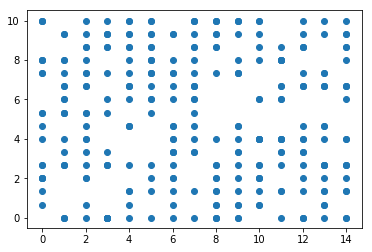

In [431]:
# Testing population generation and final representation:
# genetic algorithm parameters
a = 0
b = 10
M = 20 # Number of generations
N = 15 # Population size
p_c = 0.5 # Probability of crossover (Top 10 anime...)
p_m = 0.1 # Probability of mutation
k = 3 # Number of tournament contestants
l = 4 # Solution precision (Number of alleles per Chromosome)
generations = [[gen_random_solution(l) 
                 for _ in range(M)] # specimens per generation
                    for _ in range(N)] # generations]
genealogy = [
    (i, decode_genes(a, b, specimen)[0])
    for i, gen in enumerate(generations)
        for specimen in gen
]
display_generations(a, b, genealogy)

## Problema a resolver:
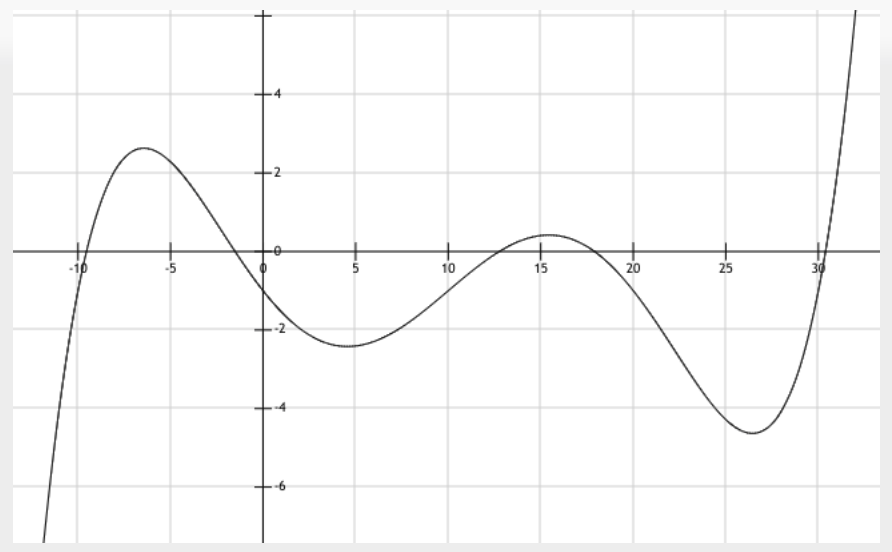

In [432]:
# THE REAL DEAL:
# genetic algorithm parameters
M = 20 # Number of generations
N = 15 # Population size
p_c = 0.5 # Probability of crossover (Top 10 anime...)
p_m = 0.1 # Probability of mutation
k = 3 # Number of tournament contestants
l = 20 # Solution precision (Number of alleles per Chromosome)

# problem specific parameters:
a = -10 # minimum value for solution space
b = 30  # maximum value for solution space
#OBJECTIVE FUNCTION
def himmelblau(x, y):
    return ((x**2)+y-11)**2+(x+(y**2)-7)**2
def obj_fun_3(x):
    return (x/10)**5-5*(x/10)**4+5*(x/10)**3+5*(x/10)**2-6*(x/10)-1

best_for_gen_x = []
# Create initial population
popu = [gen_random_solution(l) for _ in range(N)]

In [419]:
popu

[[0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
 [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
 [1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0],
 [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1],
 [1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
 [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1],
 [0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0],
 [1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1],
 [0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1],
 [1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1]]

In [395]:
fath, moth = selection(popu, k, obj_fun_3, a, b)
child = crossover_random(fath, moth)
monster = mutate_child(child, 0.05)

father contestants:
[[0, 0, 0, 1, 1, 1, 1, 0], [0, 1, 1, 1, 0, 1, 1, 1], [1, 0, 1, 1, 1, 0, 1, 1]]
mother contestants:
[[1, 1, 1, 0, 0, 0, 1, 0], [0, 0, 0, 1, 0, 1, 1, 1], [0, 1, 0, 1, 0, 0, 0, 0]]
parent a: [0, 1, 1, 1, 0, 1, 1, 1]
parent b: [1, 1, 1, 0, 0, 0, 1, 0]
parent a genes: [1, 4, 7, 2]
parent b genes: {0, 3, 5, 6}
The baby: [1, 1, 1, 0, 0, 0, 1, 1]


In [396]:
father_feno, precision = decode_genes(a, b, fath)
mother_feno = decode_genes(a, b, moth)[0]
child_feno = decode_genes(a, b, child)[0]
monster_feno = decode_genes(a, b, monster)[0]
print(f'solution precision: {precision}')
print(f'father: {father_feno} => {obj_fun_3(father_feno)}')
print(f'mother: {mother_feno} => {obj_fun_3(mother_feno)}')
print(f'child: {child_feno} => {obj_fun_3(child_feno)}')
print(f'monst: {monster_feno} => {obj_fun_3(monster_feno)}')

solution precision: 0.1568627450980392
father: 8.666666666666668 => -1.5215236213991759
mother: 25.450980392156865 => -4.456855583037644
child: 25.607843137254903 => -4.505381254110709
monst: 25.607843137254903 => -4.505381254110709


In [399]:
list(range(0, 20, 10))

[0, 10]

In [408]:
'hola mundo 1234567890'[0:10]
# 'hola mundo 1234567890'[10:20]

'hola mundo'

In [563]:
# probando nuestro código para el caso de 2 inputs (himmelblau function)
x, y = split_chromosome(popu[6], 2)
a = -6
b = 6
himmelblau(
    decode_genes(a, b, x)[0],
    decode_genes(a, b, y)[0]
)

110.66915928288815

In [578]:
crossover_two_points(popu[2], popu[4], 0.8)

ugly people, no crossover performed


([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1],
 [1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0])